In [49]:
import pandas as pd
import numpy as np
import ast
import statsmodels.api as sm
import plotnine as pn

In [18]:
SIMULATION_INPUT_FILE_PATH = "./dispersion_analysis_outputs/valetudo_rocket_v0.disp_inputs.txt"
SIMULATION_OUTPUT_FILE_PATH = "./dispersion_analysis_outputs/valetudo_rocket_v0.disp_outputs.txt"

In [20]:
data_list = []
with open(SIMULATION_INPUT_FILE_PATH) as data_file:
    for line in data_file:
        data_list.append(ast.literal_eval(line))
simulation_inputs_df = pd.DataFrame(data_list)

data_list = []
with open(SIMULATION_OUTPUT_FILE_PATH) as data_file:
    for line in data_file:
        data_list.append(ast.literal_eval(line))
simulation_outputs_df = pd.DataFrame(data_list)

In [59]:
target_variable = "impact_x"
X = simulation_inputs_df
X = sm.add_constant(X)
y = simulation_outputs_df[target_variable]

In [60]:
sim_model = sm.OLS(y, X).fit()

In [63]:
simulation_inputs_df.head()

,rocket_mass,rocket_inertia_11,rocket_inertia_33,motor_dry_mass,motor_inertia_11,motor_inertia_33,motor_dry_mass_position,impulse,burn_time,nozzle_radius,...,fin_root_chord,fin_tip_chord,fin_distance_to_CM,inclination,heading,rail_length,ensemble_member,cd_s_drogue,lag_rec,lag_se
0,7.256957,3.708979,0.006989,1.001676,3.639389,0.007083,0.501699,1423.906936,5.211348,0.021371,...,0.057648,0.017533,-0.905125,84.050780,52.954259,5.699532,2,0.327590,0.395563,0.428953
1,7.255969,3.701674,0.007096,0.999814,3.659063,0.007024,0.501081,1355.449381,4.742944,0.022224,...,0.057934,0.017597,-0.907460,86.583325,55.399841,5.700111,8,0.380728,0.845275,0.818287
2,7.255493,3.669465,0.007116,0.999713,3.633004,0.007066,0.499029,1382.860785,4.644385,0.022167,...,0.058578,0.018415,-0.906187,84.986284,55.301642,5.700375,8,0.466085,1.530248,0.916685
3,7.257525,3.695506,0.007101,0.998570,3.694279,0.006954,0.502066,1404.234822,6.016741,0.021933,...,0.057986,0.017971,-0.905393,85.959307,51.562725,5.699373,4,0.240977,0.369348,1.025470
4,7.255779,3.707758,0.007036,1.001142,3.703394,0.006928,0.500793,1451.441790,7.643088,0.022864,...,0.058427,0.018053,-0.907701,85.289253,54.256238,5.700493,2,0.444036,0.748039,0.772641


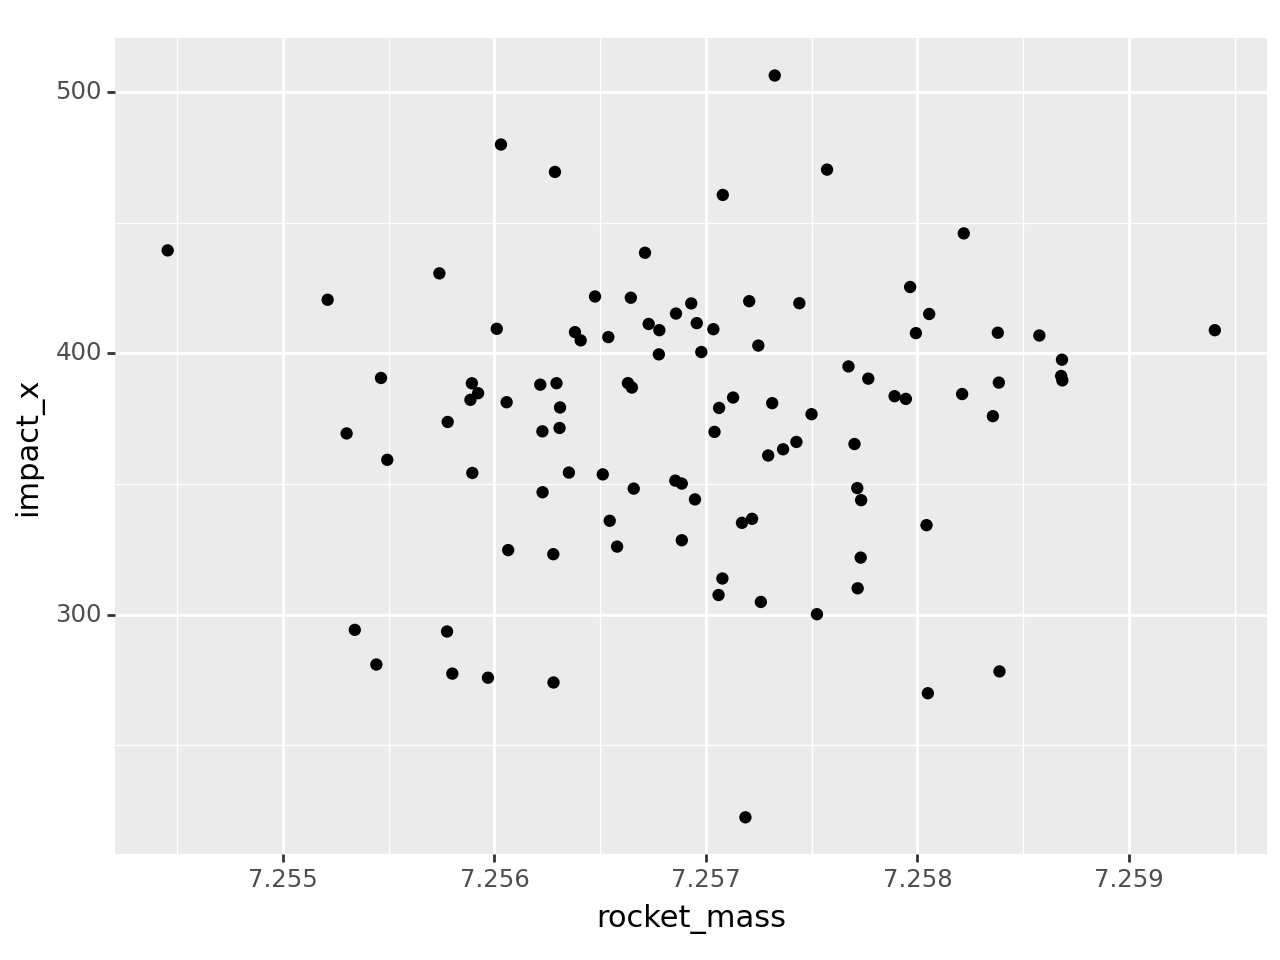

<Figure Size: (640 x 480)>

In [66]:
pn.ggplot(pn.aes(x = simulation_inputs_df["rocket_mass"], y = y)) + \
    pn.geom_point()

In [62]:
print(sim_model.summary())

                            OLS Regression Results                            
Dep. Variable:               impact_x   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     14.93
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           8.22e-20
Time:                        19:03:07   Log-Likelihood:                -424.60
No. Observations:                 100   AIC:                             919.2
Df Residuals:                      65   BIC:                             1010.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       